**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing and reading the dataset**

In [ ]:
df = pd.read_csv('/content/Walmart_Store_sales-knn.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**Exploring data**

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


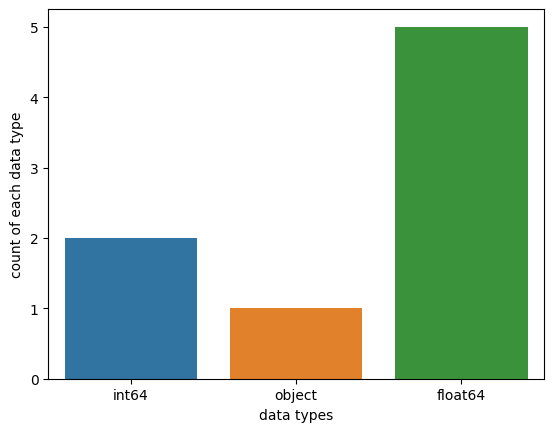

In [ ]:
sns.countplot(x=df.dtypes ,data=df)
plt.xlabel("data types")
plt.ylabel("count of each data type")
plt.show()

In [ ]:
#checking null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

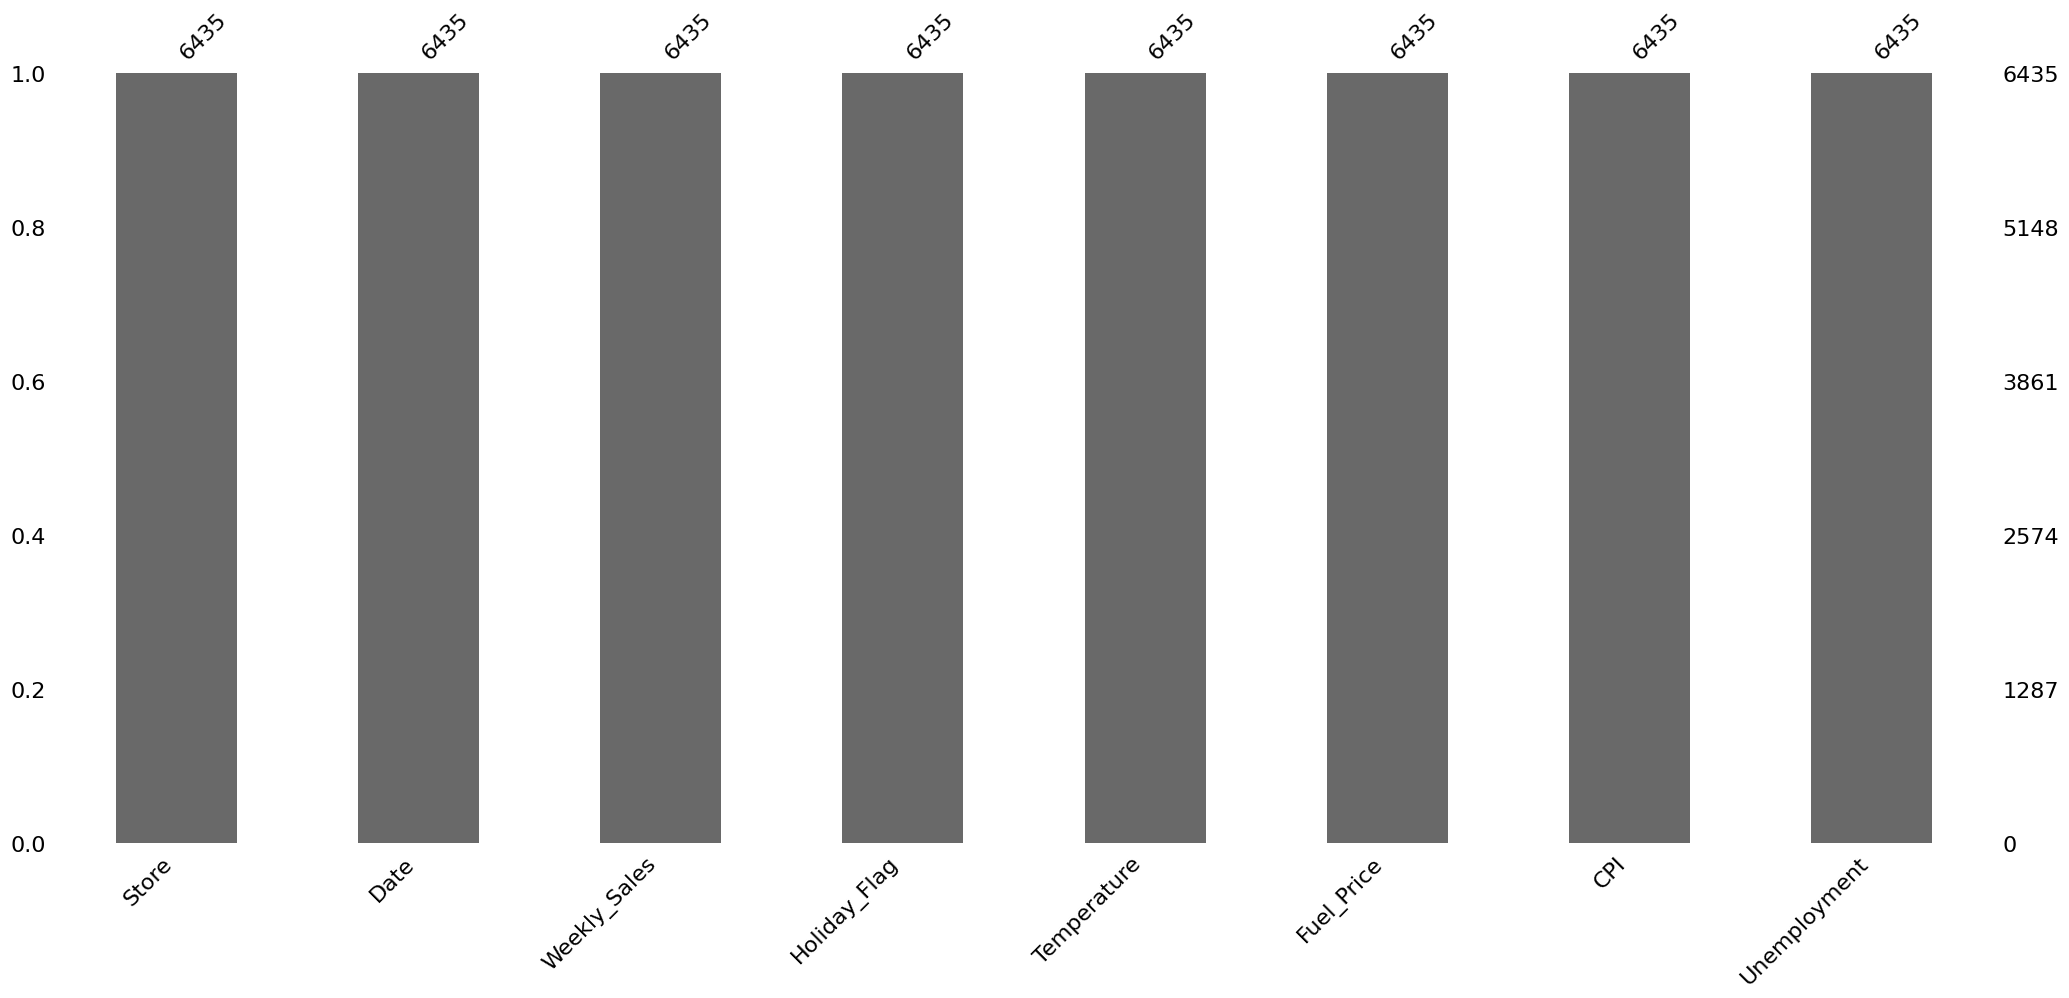

In [ ]:
#checking missing values graphically
import missingno as msno
p=msno.bar(df)

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<Axes: >

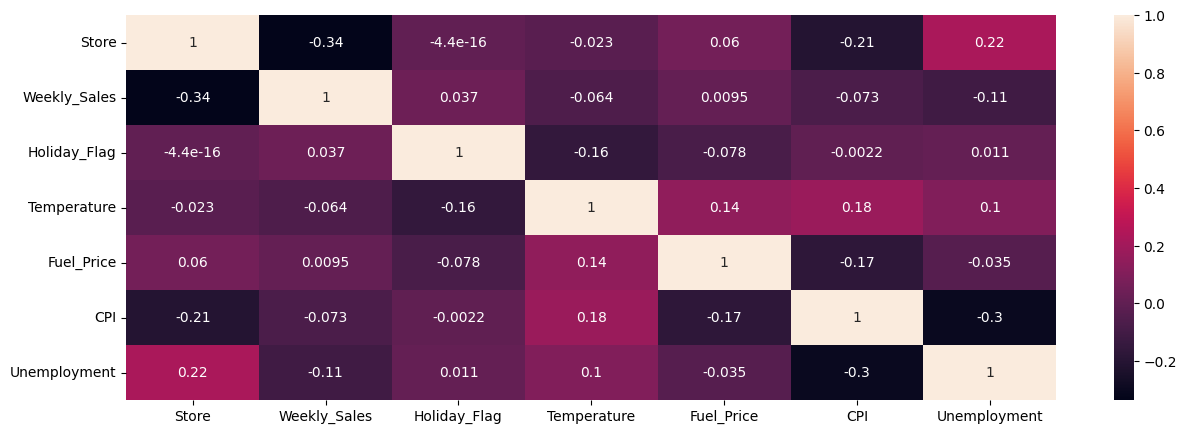

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (15,5))
sns.heatmap(corr, annot = True)

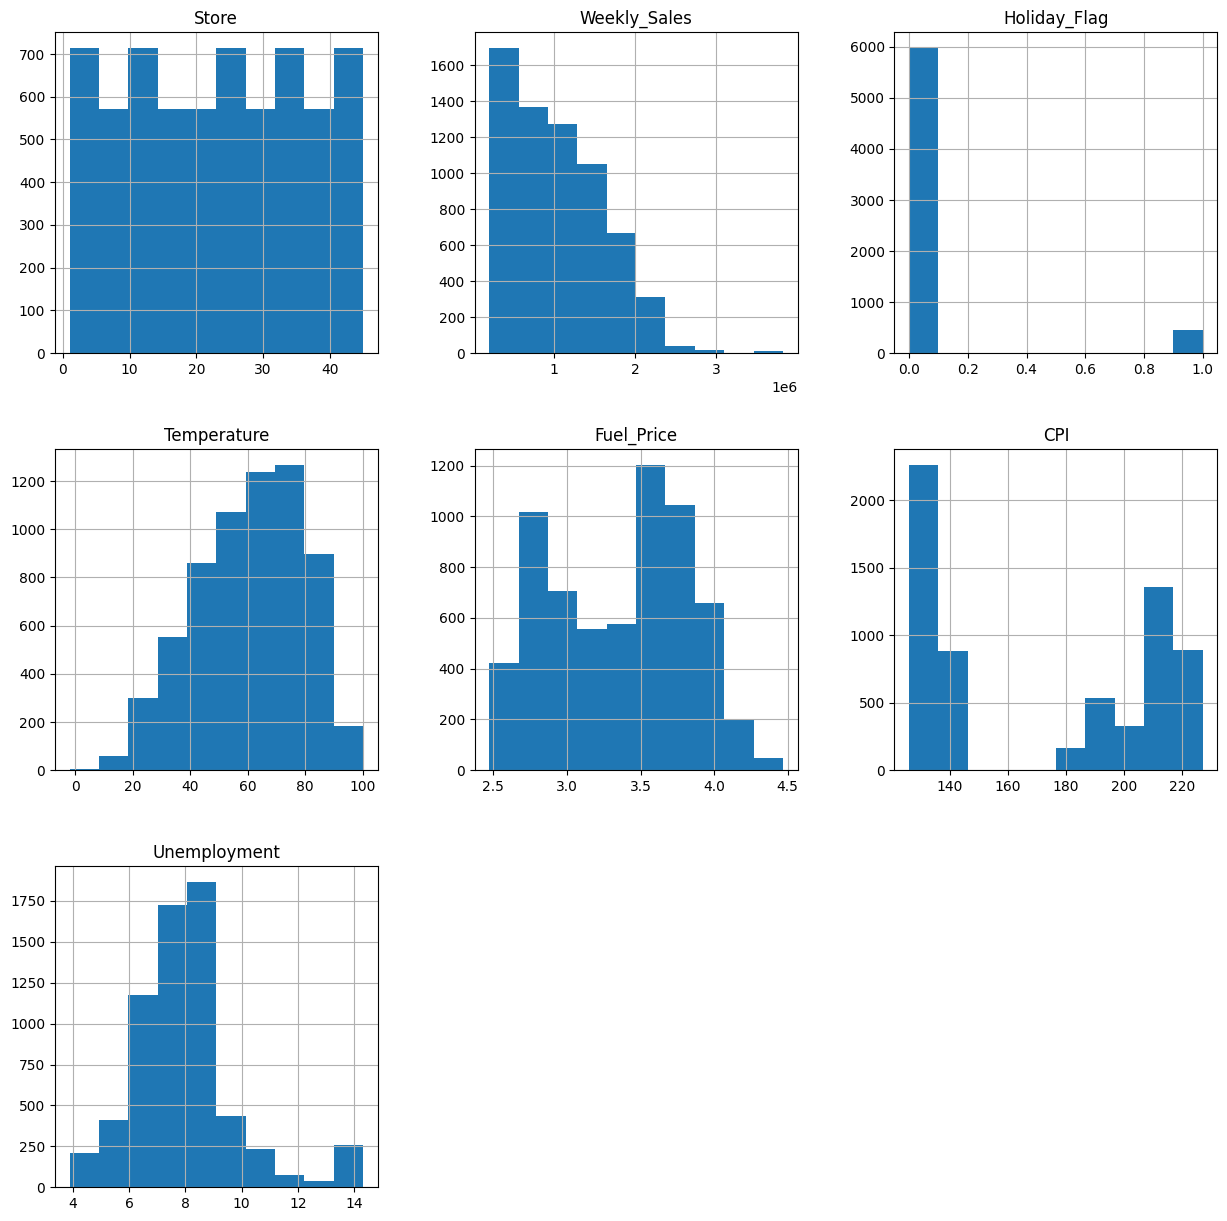

In [ ]:
histo = df.hist(figsize = (15,15))

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df,figsize=(25, 25))

Output hidden; open in https://colab.research.google.com to view.

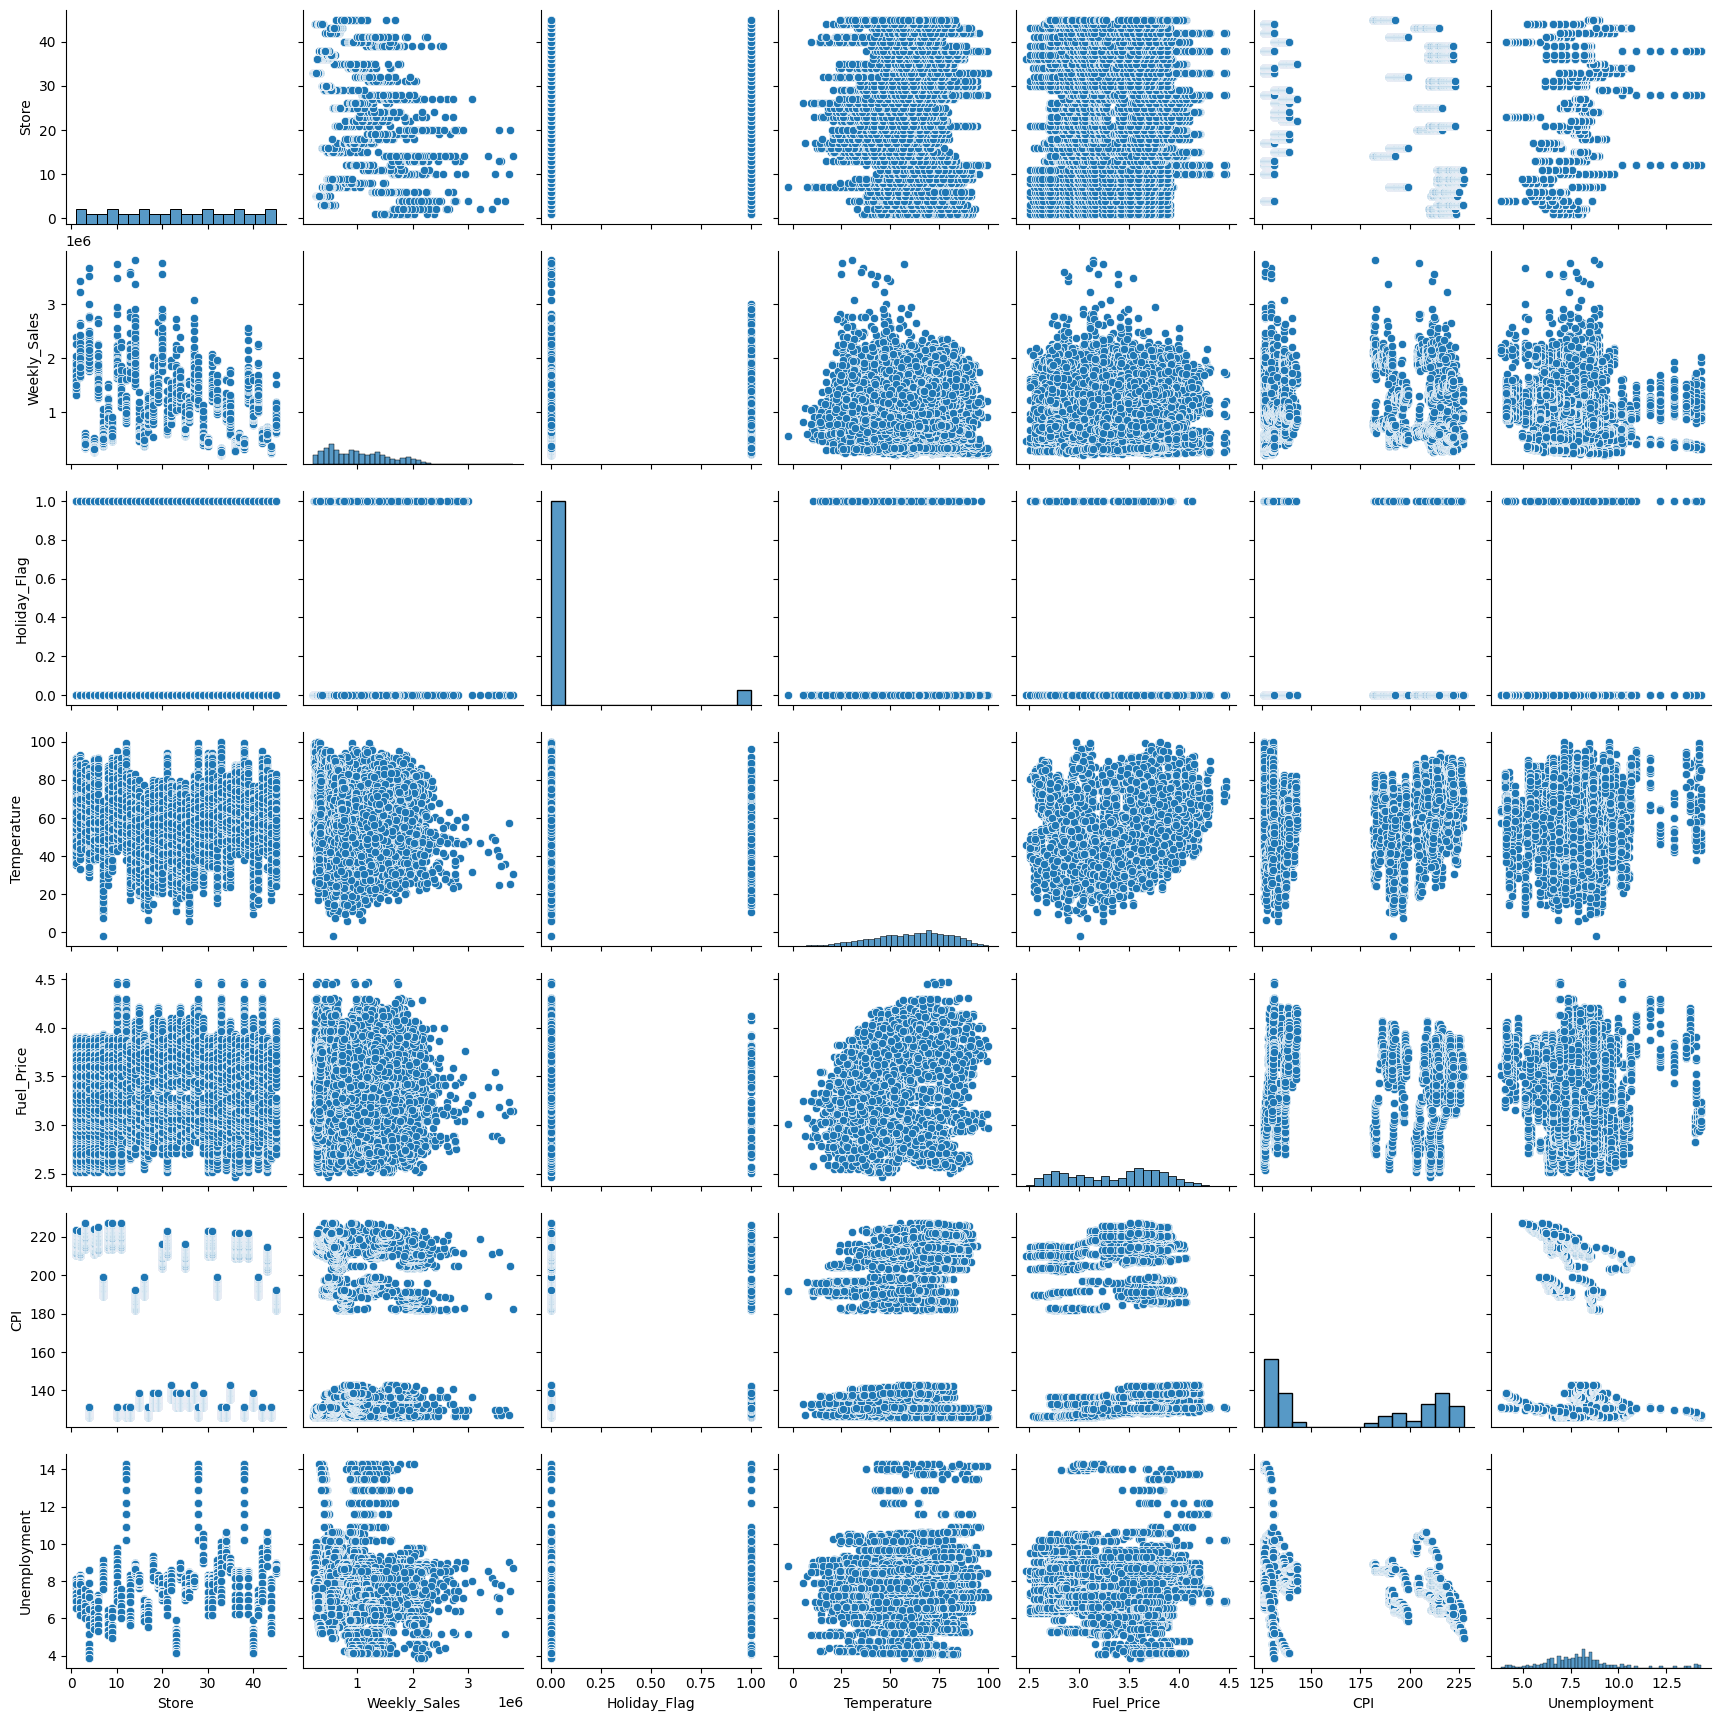

In [ ]:
p=sns.pairplot(df)#hue is used for colour

**Data Cleaning**

In [ ]:
df.drop(['Date'], axis =1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


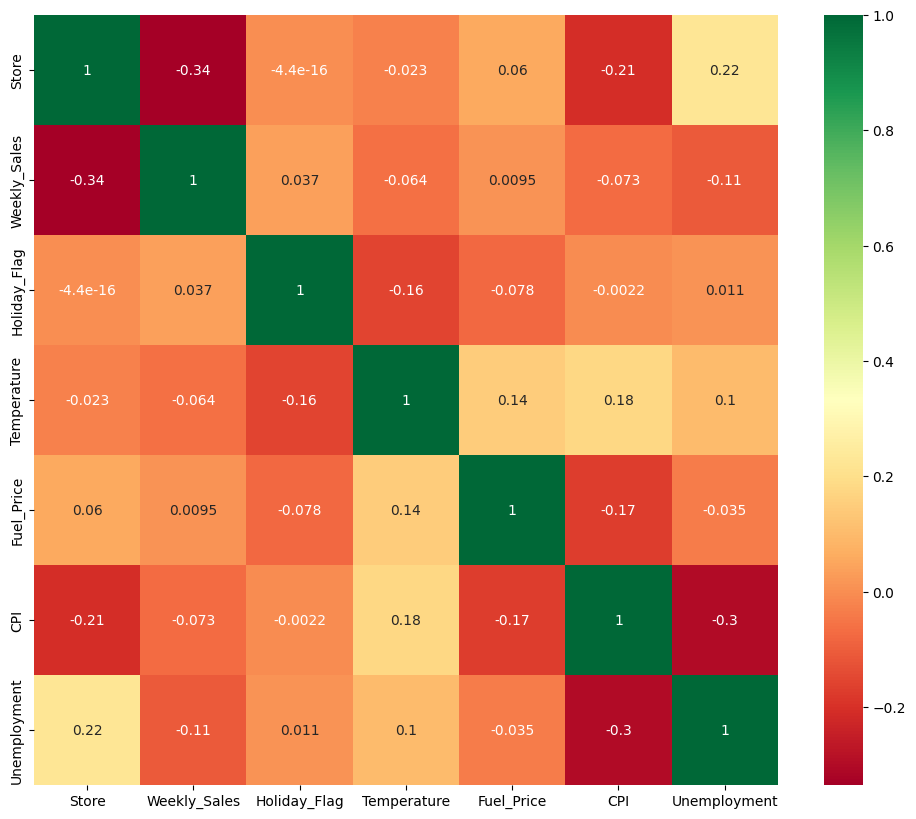

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [ ]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

**Split dataset into independent and dependent features**

In [ ]:
df.drop(['Date'], axis = 1,inplace = True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df = df.loc[:, ["Holiday_Flag","Temperature","Fuel_Price","CPI","Unemployment","Weekly_Sales","Store"]]
df.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Store
0,0,42.31,2.572,211.096358,8.106,1643690.90,1
1,1,38.51,2.548,211.242170,8.106,1641957.44,1
2,0,39.93,2.514,211.289143,8.106,1611968.17,1
3,0,46.63,2.561,211.319643,8.106,1409727.59,1
4,0,46.50,2.625,211.350143,8.106,1554806.68,1


In [ ]:
x = df.iloc[:,:-1]
y = df['Store']

In [ ]:
x.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,0,42.31,2.572,211.096358,8.106,1643690.90
1,1,38.51,2.548,211.242170,8.106,1641957.44
2,0,39.93,2.514,211.289143,8.106,1611968.17
3,0,46.63,2.561,211.319643,8.106,1409727.59
4,0,46.50,2.625,211.350143,8.106,1554806.68


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Store, dtype: int64

In [ ]:
x.shape , y.shape

((6435, 6), (6435,))

**Splitting the dataset into training and testing set**

In [ ]:
#splitting the dataset into the training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [ ]:
x_train.shape

(4826, 6)

In [ ]:
x_test.shape

(1609, 6)

In [ ]:
y_train.shape

(4826,)

In [ ]:
y_test.shape

(1609,)

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
#from sklearn import preprocessing
#from sklearn import utils

#convert y values to categorical values
#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y)

#view transformed values
#print(y_transformed)

In [ ]:
#fit logistic regression model
#from sklearn.neighbors import KNeighborsClassifier

#classifier = KNeighborsClassifier()
#classifier.fit(x, y_transformed)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)

    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred[0:5]

array([28, 32, 16, 36, 25])

In [ ]:
#Test Model accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7694220012430081

In [ ]:
#Train Model Accuracy
y_predTrain = knn.predict(x_train)
y_predTrain[0:5]
accuracy_score(y_train, y_predTrain)

0.8286365520099461

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  4,  0, ...,  0,  0,  0],
       [ 3, 28,  0, ...,  0,  0,  0],
       [ 0,  0, 19, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 31,  0,  0],
       [ 0,  0,  0, ...,  0, 32,  0],
       [ 0,  0,  0, ...,  0,  0, 30]])

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}A'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]A


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 83.21939092604102 % and k = [1]


**Visulaziation**

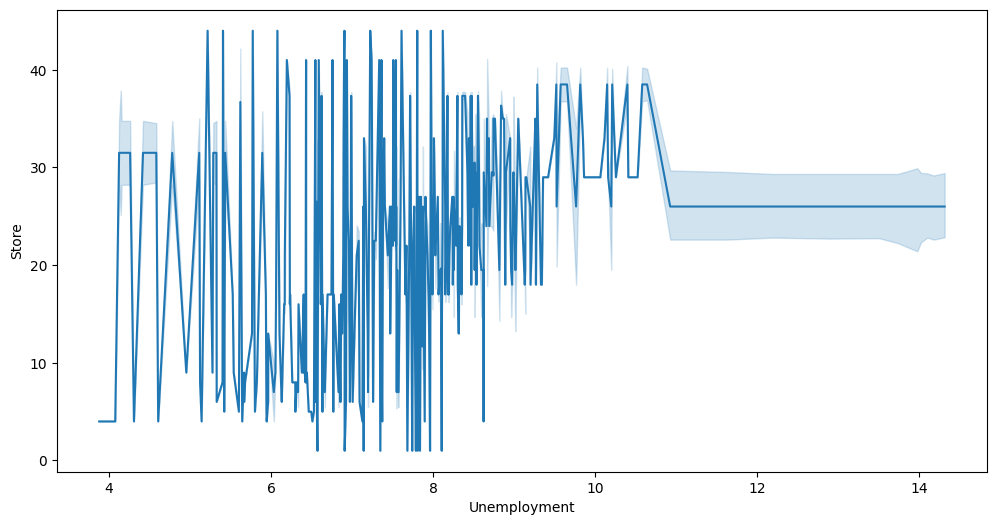

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x="Unemployment",y="Store",data = df)
plt.show()

In [ ]:
#plt.figure(figsize=(12,5))
#p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
#p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7694220012430081